  # House price Prediction - Deployment

In [101]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [102]:
dataSet = pd.read_csv('hotelPriceCleaned.csv')
dataSet.shape

(74142, 17)

In [103]:
dataSet.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,market_segment,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,totalStayNights,totalPerson
0,1,7,2015,5,1,0,3,0,2,0,0,2,75.0,0,0,1,1.0
1,1,13,2015,5,1,0,2,0,0,0,0,2,75.0,0,0,1,1.0
2,1,14,2015,5,1,0,6,0,0,0,0,2,98.0,0,1,2,2.0
3,1,0,2015,5,1,0,3,2,2,0,0,2,107.0,0,0,2,2.0
4,1,9,2015,5,1,1,3,2,2,0,0,2,103.0,0,1,2,2.0


In [104]:
independent = dataSet.drop(columns='adr')
dependent = dataSet[['adr']]

In [105]:
independent.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,market_segment,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,totalStayNights,totalPerson
0,1,7,2015,5,1,0,3,0,2,0,0,2,0,0,1,1.0
1,1,13,2015,5,1,0,2,0,0,0,0,2,0,0,1,1.0
2,1,14,2015,5,1,0,6,0,0,0,0,2,0,1,2,2.0
3,1,0,2015,5,1,0,3,2,2,0,0,2,0,0,2,2.0
4,1,9,2015,5,1,1,3,2,2,0,0,2,0,1,2,2.0


In [106]:
dependent.head()

,adr
0,75.0
1,75.0
2,98.0
3,107.0
4,103.0


In [107]:
independentScaler = StandardScaler()
independent = pd.DataFrame(independentScaler.fit_transform(independent), columns= independent.columns)
independent.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,market_segment,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,totalStayNights,totalPerson
0,1.400294,-0.888574,-1.82427,-0.062444,-1.674065,-0.544276,-1.772949,-0.735479,0.156552,-0.113241,-0.068754,-0.052593,-0.304349,-0.875107,-1.023153,-1.561893
1,1.400294,-0.817880,-1.82427,-0.062444,-1.674065,-0.544276,-2.574356,-0.735479,-0.855971,-0.113241,-0.068754,-0.052593,-0.304349,-0.875107,-1.023153,-1.561893
2,1.400294,-0.806098,-1.82427,-0.062444,-1.674065,-0.544276,0.631272,-0.735479,-0.855971,-0.113241,-0.068754,-0.052593,-0.304349,0.313625,-0.646426,-0.133739
3,1.400294,-0.971049,-1.82427,-0.062444,-1.674065,-0.544276,-1.772949,0.325249,0.156552,-0.113241,-0.068754,-0.052593,-0.304349,-0.875107,-0.646426,-0.133739
4,1.400294,-0.865009,-1.82427,-0.062444,-1.674065,0.352892,-1.772949,0.325249,0.156552,-0.113241,-0.068754,-0.052593,-0.304349,0.313625,-0.646426,-0.133739


In [108]:
dependentScaler = StandardScaler()
dependent = pd.DataFrame(dependentScaler.fit_transform(dependent), columns= dependent.columns)
dependent.head()

,adr
0,-0.876426
1,-0.876426
2,-0.391900
3,-0.202303
4,-0.286568


In [109]:
xTrain, xTest, yTrain, yTest = train_test_split(independent.values, dependent.values, test_size=0.30, random_state= 42)

In [110]:
regressor = XGBRegressor()
regressor.fit(xTrain, yTrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [111]:
yPred = regressor.predict(xTest)

In [112]:
r2_score(yTest, yPred)

0.8586909940394811

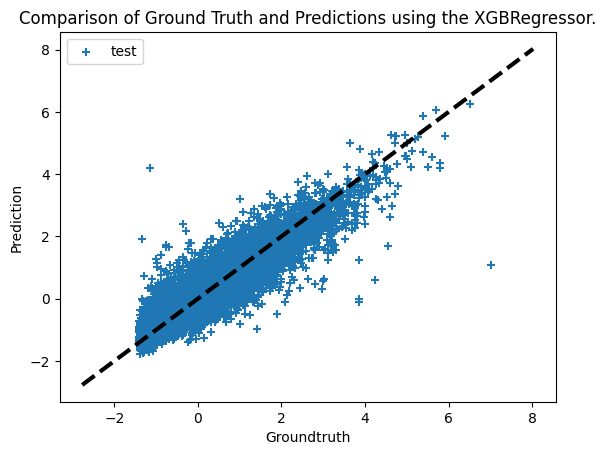

In [113]:
# Prediction graph
xmin= min(yTest.min(), yPred.min() )-1
xmax= max(yTest.max(), yPred.max() )+1
fig = plt.figure(1)
plt.scatter(yTest ,yPred, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') # droite separatrice d'equation x2=x1
plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title("Comparison of Ground Truth and Predictions using the {}.".format('XGBRegressor'))
plt.legend()
plt.show() 

In [114]:
import pickle

In [115]:
fileName = "independentScaler.sav"
pickle.dump(independentScaler, open(fileName, 'wb'))

In [142]:
inputStandatScaler = pickle.load(open("independentScaler.sav", "rb"))
userInput = dataSet.drop(columns='adr').values[5]
userInput = inputStandatScaler.transform([userInput])
userInput

C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 1.40029434,  0.030443  , -1.82427022, -0.06244416, -1.6740653 ,
        -0.54427635,  0.631272  , -0.735479  , -0.85597148, -0.11324074,
        -0.06875367, -0.05259306, -0.30434875,  0.31362513, -0.26969795,
        -0.13373894]])

In [143]:
# Model deployment

In [144]:
fileName = "hotelPriceModel.sav"
pickle.dump(regressor,open(fileName, 'wb'))

In [145]:
loadModel = pickle.load(open("hotelPriceModel.sav", "rb"))
result = loadModel.predict(userInput)
result = result[0]

In [146]:
# mean of adr column
mean = dataSet['adr'].mean()
# std of adr column
stdOFAdr = dataSet['adr'].std()

In [154]:
# standar scaler convert to numerical value
original_data = (result * stdOFAdr + meanOfAdr)

In [155]:
original_data

76.28184576769151